In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
# import the necessary packages

In [66]:
data = pd.read_csv("data.csv") # read the csv file using pandas
data.head() # show only a few tuples to get an idea of the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
data.describe(include='all') # Show basic summary of the data including the categorical features

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
count,614,599,611,599,613,582,612.000000,613.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,487,398,345,479,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5405.540850,1620.888940,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6118.914057,2928.624748,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2875.750000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3806.000000,1167.000000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5803.750000,2302.000000,168.000000,360.00000,1.000000,NaN,NaN


In [68]:
data.info() # counts and data types of different features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [69]:
data.isnull().sum() # showing null values for the features

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

Pre-process some data in order to visualize them. Firstly, Drop the LoanID feature as it's not useful for the model.

In [ ]:
data = data.drop('Loan_ID', axis=1) # drop loanid feature
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


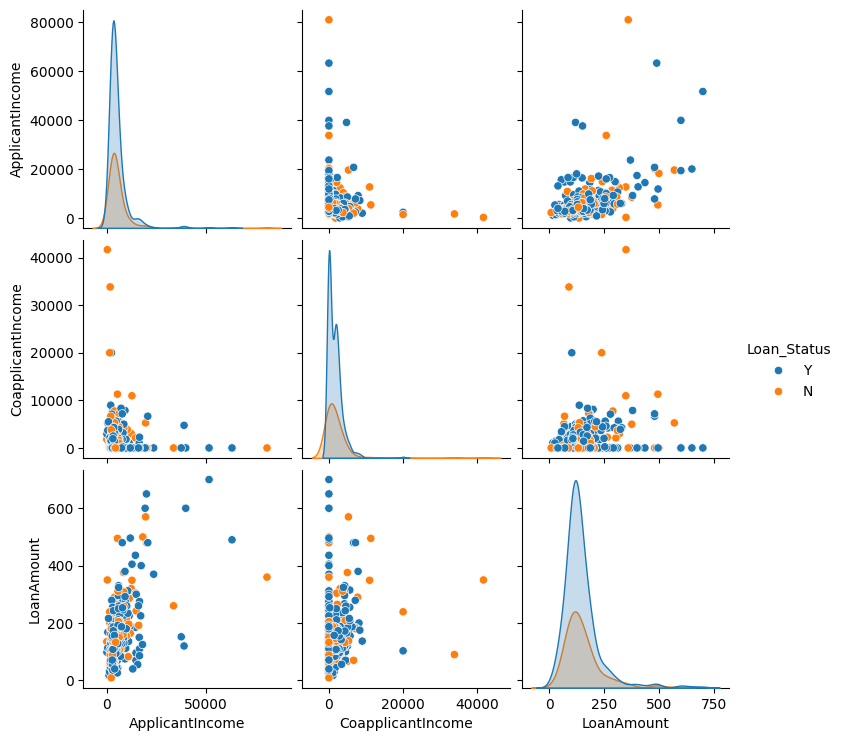

In [71]:
sns.pairplot(data, hue='Loan_Status', x_vars=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"], 
             y_vars=["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]) # use seaborn pairplot to show scatter matrix

<Axes: xlabel='Self_Employed'>

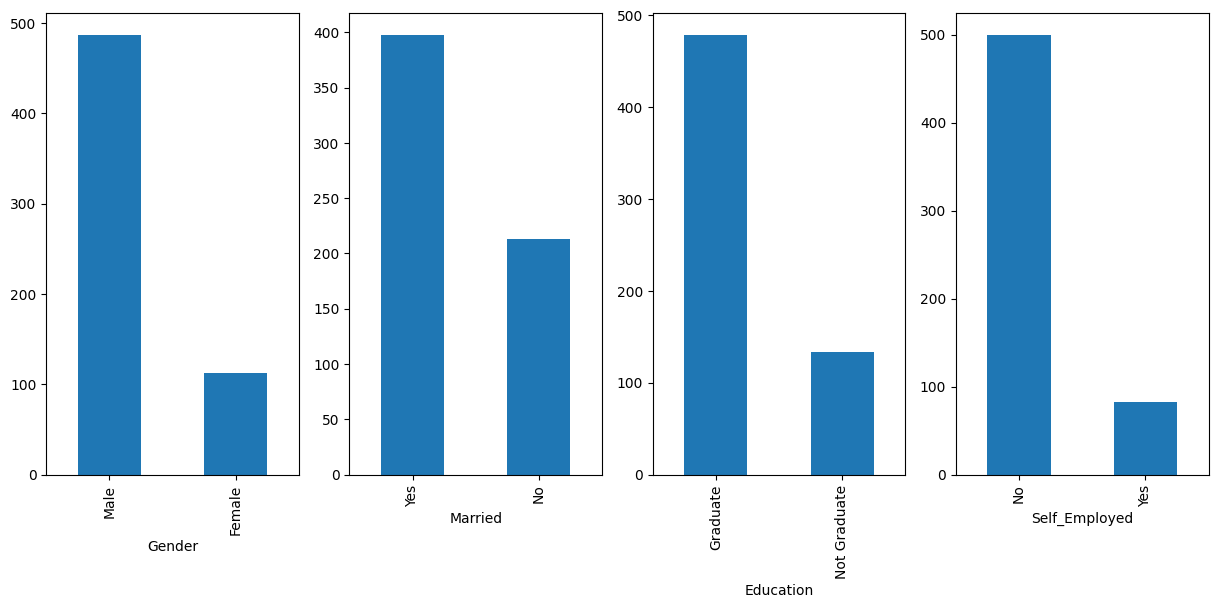

In [72]:
fig, axes = plt.subplots(1, 4, figsize=(15, 6))

gender_counts = data['Gender'].value_counts()
gender_counts.plot(kind='bar', ax=axes[0])

married_counts = data['Married'].value_counts()
married_counts.plot(kind='bar', ax=axes[1])

education_counts = data['Education'].value_counts()
education_counts.plot(kind='bar', ax=axes[2])

self_employed_counts = data['Self_Employed'].value_counts()
self_employed_counts.plot(kind='bar', ax=axes[3])

# Visualize the missing boolean features with null values

<Axes: xlabel='Credit_History'>

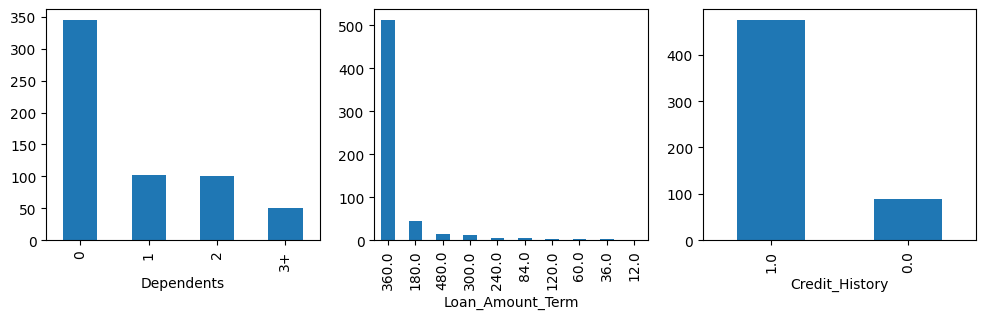

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

dependent_counts = data['Dependents'].value_counts()
dependent_counts.plot(kind='bar', ax=axes[0])

loan_term_counts = data['Loan_Amount_Term'].value_counts()
loan_term_counts.plot(kind='bar', ax=axes[1])

loan_term_counts = data['Credit_History'].value_counts()
loan_term_counts.plot(kind='bar', ax=axes[2])

# Visualize the rest of categorical features with null values

<Axes: xlabel='Loan_Status'>

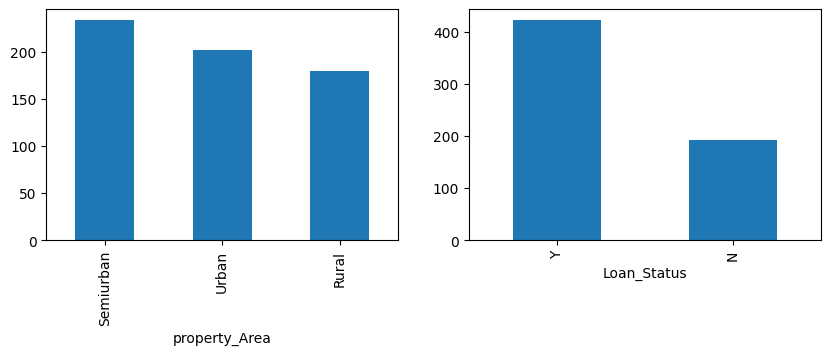

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

area_counts = data['property_Area'].value_counts()
area_counts.plot(kind='bar', ax=axes[0])

loan_status_counts = data['Loan_Status'].value_counts()
loan_status_counts.plot(kind='bar', ax=axes[1])

# Visualize the rest of categorical features without any null values

<Axes: xlabel='LoanAmount', ylabel='Frequency'>

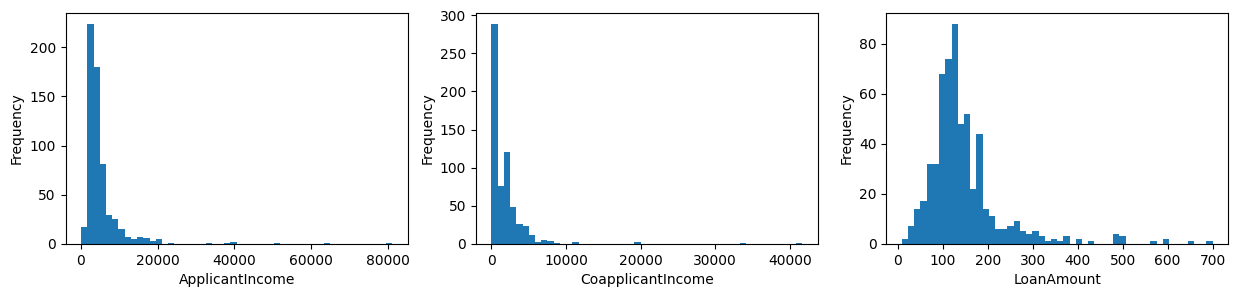

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))

data['ApplicantIncome'].plot(kind='hist',bins=50, xlabel="ApplicantIncome",ax=axes[0])
data['CoapplicantIncome'].plot(kind='hist',bins=50, xlabel="CoapplicantIncome",ax=axes[1])
data['LoanAmount'].plot(kind='hist',bins=50, xlabel="LoanAmount",ax=axes[2])

# Visualize the continuous features with null values using histograms

Now for some data processing. Let's first convert strings in data to numerical values in order to allow further visualization. Turn the categorical names to binary values.

In [76]:
label_encoder = LabelEncoder()

data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Married'] = label_encoder.fit_transform(data['Married'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Self_Employed'] = label_encoder.fit_transform(data['Self_Employed'])
data['Credit_History'] = label_encoder.fit_transform(data['Credit_History'])
data['Loan_Status'] = label_encoder.fit_transform(data['Loan_Status'])

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,NaN,360.0,1,Urban,1
1,1,1,1,0,0,NaN,1508.0,128.0,360.0,1,Rural,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1,Urban,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1,Urban,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1,Urban,1


In [77]:
gender_mode = data['Gender'].mode()[0]
married_mode = data['Married'].mode()[0]
education_mode = data['Education'].mode()[0]
self_employed_mode = data['Self_Employed'].mode()[0] 

# Get the modes of binary features

values = {"Gender": gender_mode, "Married": married_mode, "Education": education_mode, "Self_Employed": self_employed_mode}

data = data.fillna(value=values) # fill the binary null features with their respective modes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    612 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 45.7+ KB


In [78]:
dependents_mode = data['Dependents'].mode()[0]
loan_term_mode = data['Loan_Amount_Term'].mode()[0]
credit_history_mode = data['Credit_History'].mode()[0]

# Get the modes of binary features

values = {"Dependents": dependents_mode, "Loan_Amount_Term": loan_term_mode, "Credit_History": credit_history_mode}

data = data.fillna(value=values) # fill the other categorical null features with their respective modes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    612 non-null    float64
 6   CoapplicantIncome  613 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 45.7+ KB


Now for the null values in numeric features. Both ApplicantIncome and CoApplicantIncome look positively skewed. Therefore, it's better to use the median to fill the null values here. LoanAmount however looks closer to a normal distribution. So I will choose mean for this feature instead.

In [79]:
applicant_income_median = data['ApplicantIncome'].median()
coapplicant_income_median = data['CoapplicantIncome'].median()
# choose median for applicant and coapplicant incomes

loan_amount_mean = data['LoanAmount'].mean()
# choose mean for loan amount

values = {"ApplicantIncome": applicant_income_median, "CoapplicantIncome": coapplicant_income_median, "LoanAmount": loan_amount_mean}

data = data.fillna(value=values) # fill the numerical features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    int64  
 10  property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 45.7+ KB


Now all the data with missing values are filled out. But there are more issues so let's clean the data.

<Axes: xlabel='CoapplicantIncome', ylabel='Frequency'>

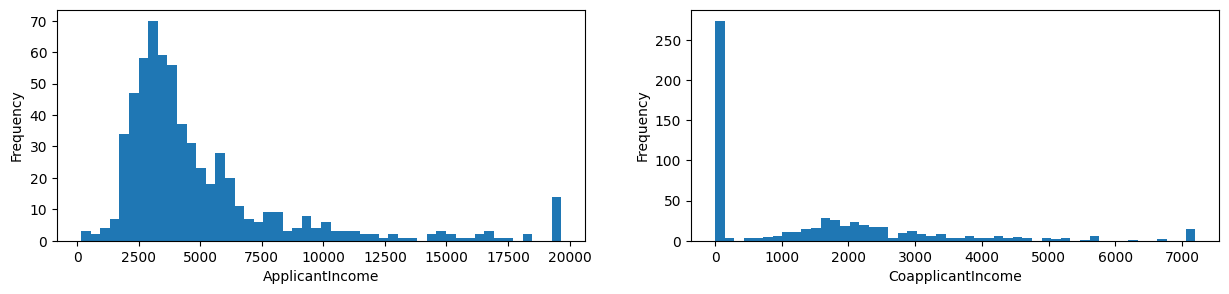

In [80]:
cap_value = data['ApplicantIncome'].quantile(0.98)
data['ApplicantIncome'] = data['ApplicantIncome'].clip(upper=cap_value)

cap_value = data['CoapplicantIncome'].quantile(0.98)
data['CoapplicantIncome'] = data['CoapplicantIncome'].clip(upper=cap_value)

# Remove outliers past 98% percentile

fig, axes = plt.subplots(1, 2, figsize=(15, 3))

data['ApplicantIncome'].plot(kind='hist',bins=50, xlabel="ApplicantIncome",ax=axes[0])
data['CoapplicantIncome'].plot(kind='hist',bins=50, xlabel="CoapplicantIncome",ax=axes[1])

# Visualize the features now looks a lot better

<Axes: xlabel='LoanAmount', ylabel='Frequency'>

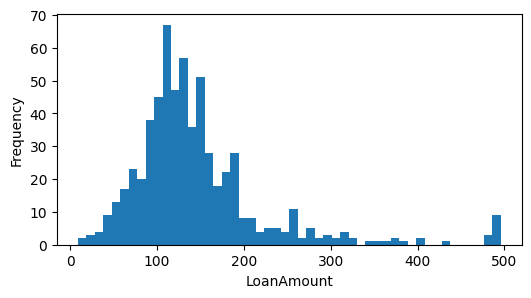

In [81]:
cap_value = data['LoanAmount'].quantile(0.99)
data['LoanAmount'] = data['LoanAmount'].clip(upper=cap_value)

# Remove outliers past 99% percentile for LoanAmount feature

fig, axes = plt.subplots(1, 1, figsize=(6, 3))

data['LoanAmount'].plot(kind='hist',bins=50, xlabel="LoanAmount",ax=axes)

Now let's visualize LoanAmountTerm as a histogram instead of bins

<Axes: xlabel='Loan_Amount_Term', ylabel='Frequency'>

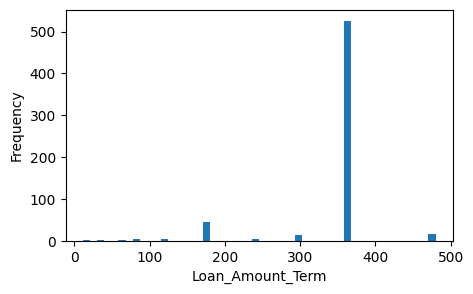

In [82]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
data['Loan_Amount_Term'].plot(kind='hist',bins=50, xlabel="Loan_Amount_Term",ax=axes)

In [83]:
cap_value = data['Loan_Amount_Term'].quantile(0.10)
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].clip(lower=cap_value)

# clip all the lower duration terms to a lower threshold using the 10% percentile

<Axes: xlabel='Loan_Amount_Term', ylabel='Frequency'>

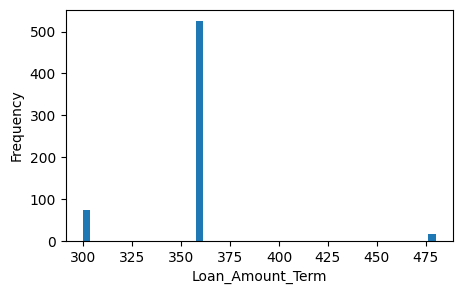

In [84]:
fig, axes = plt.subplots(1, 1, figsize=(5, 3))
data['Loan_Amount_Term'].plot(kind='hist',bins=50, xlabel="Loan_Amount_Term",ax=axes)

Loan Amount Term looks a lot better now. Let's now one hot encode some categories with more than 3 categories.

In [85]:
categorical_features = ['Dependents', 'Loan_Amount_Term', 'property_Area']

data = pd.get_dummies(data, columns=categorical_features, drop_first=False)
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,property_Area_Rural,property_Area_Semiurban,property_Area_Urban
0,1,0,0,0,5849.0,0.0,146.412162,1,1,True,False,False,False,False,True,False,False,False,True
1,1,1,0,0,3806.0,1508.0,128.000000,1,0,False,True,False,False,False,True,False,True,False,False
2,1,1,0,1,3000.0,0.0,66.000000,1,1,True,False,False,False,False,True,False,False,False,True
3,1,1,1,0,2583.0,2358.0,120.000000,1,1,True,False,False,False,False,True,False,False,False,True
4,1,0,0,0,6000.0,0.0,141.000000,1,1,True,False,False,False,False,True,False,False,False,True


In [86]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,property_Area_Rural,property_Area_Semiurban,property_Area_Urban
Gender,1.000000,0.337491,0.022644,-0.006682,0.077168,0.171167,0.138035,-0.017503,0.013738,-0.148315,-0.019351,0.133462,0.111491,0.077078,-0.053428,-0.040328,0.069564,-0.095937,0.031797
Married,0.337491,1.000000,0.012145,-0.038153,0.036118,0.197374,0.152805,0.033224,0.096657,-0.333533,0.107334,0.240649,0.127181,0.103505,-0.068080,-0.062476,-0.013153,0.011709,0.000629
Education,0.022644,0.012145,1.000000,-0.024280,-0.179029,-0.053938,-0.166789,-0.035940,-0.079391,-0.045281,-0.016629,0.038032,0.052144,0.082001,-0.083257,0.017052,0.071405,-0.044913,-0.022681
Self_Employed,-0.006682,-0.038153,-0.024280,1.000000,0.111021,-0.017180,0.091971,0.092270,0.010880,-0.053245,0.063438,0.016311,-0.012448,0.024879,-0.000652,-0.050681,0.023049,-0.021382,-0.000211
ApplicantIncome,0.077168,0.036118,-0.179029,0.111021,1.000000,-0.182997,0.613296,0.005578,0.001327,-0.097629,0.070546,-0.014334,0.098338,0.022483,-0.008052,-0.028859,0.021833,-0.013496,-0.007180
CoapplicantIncome,0.171167,0.197374,-0.053938,-0.017180,-0.182997,1.000000,0.241433,0.044081,0.003509,0.017389,-0.017705,0.020504,-0.034697,0.038870,-0.018078,-0.040458,0.065504,-0.016356,-0.046468
LoanAmount,0.138035,0.152805,-0.166789,0.091971,0.613296,0.241433,1.000000,0.026477,-0.044467,-0.151634,0.066620,0.026840,0.144697,-0.019255,0.021193,-0.007734,0.051374,-0.007294,-0.042160
Credit_History,-0.017503,0.033224,-0.035940,0.092270,0.005578,0.044081,0.026477,1.000000,0.423212,0.013090,0.041563,-0.014764,-0.059580,-0.014547,0.033617,-0.045803,-0.019990,0.005692,0.013457
Loan_Status,0.013738,0.096657,-0.079391,0.010880,0.001327,0.003509,-0.044467,0.423212,1.000000,-0.003044,-0.038740,0.062384,-0.026123,-0.012728,0.054963,-0.098067,-0.100694,0.136540,-0.043621
Dependents_0,-0.148315,-0.333533,-0.045281,-0.053245,-0.097629,0.017389,-0.151634,0.013090,-0.003044,1.000000,-0.531373,-0.528246,-0.358315,-0.120579,0.090565,0.047238,0.044015,-0.004173,-0.038264


Time to train the model. Let's prepare the data and split them for train and test.

In [87]:
X = data.drop('Loan_Status', axis=1)  # features without the label
y = data['Loan_Status']  # The target Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # split data to train and test

In [88]:
model = LogisticRegression()
scores = cross_val_score(model, X_train, y_train, cv=5) # 5 fold cross-validation
print("Mean CV accuracy:", scores.mean())

Mean CV accuracy: 0.7943516800659657


C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [89]:
model = LogisticRegression()
model.fit(X_train, y_train) # now fit the entire training set

C:\Users\abhin\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

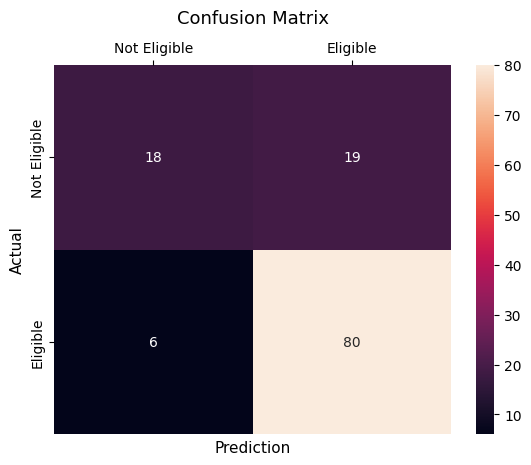

In [90]:
y_pred = model.predict(X_test) # evaluate the test set
cf_matrix = confusion_matrix(y_test, y_pred) # compute the confusion matrix of the test set

sns.heatmap(cf_matrix, annot=True, xticklabels=['Not Eligible','Eligible'],yticklabels=['Not Eligible','Eligible']) 
# use seaborn to show heatmap of the confusion matrix along with the numbers

plt.ylabel('Actual', fontsize=11)
plt.xlabel('Prediction', fontsize=11)
plt.title('Confusion Matrix', fontsize=13, pad=30) 
# add labels and titles

plt.gca().xaxis.tick_top() # add visual tick marks

In [91]:
print(classification_report(y_test, y_pred)) # show summary report

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        37
           1       0.81      0.93      0.86        86

    accuracy                           0.80       123
   macro avg       0.78      0.71      0.73       123
weighted avg       0.79      0.80      0.78       123

